<a href="https://colab.research.google.com/github/cameronKenworthy/DS-Unit-1-Sprint-2-Statistics/blob/master/module1/LS_DS_121_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [1]:
### YOUR CODE STARTS HERE
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data


--2020-01-21 19:55:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-01-21 19:56:00 (286 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [0]:
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime',
                          'duty-free', 'south-africa'],
                 na_values="?")

In [4]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
df = df.replace({'y':1, 'n':0})

In [6]:
df.isnull().sum()

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

In [0]:
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [8]:
dem['budget'].mean()

0.8884615384615384

In [88]:
rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [0]:
def my_ttest(dfdem, dfrep):
  if(dfdem.mean() > dfrep.mean()):
    print('dems support more', dfdem.mean(), dfrep.mean())
    dfdem.hist(color='b')
    plt.show()
    dfrep.hist(color='r')
    plt.show()

  else:
    print('republicans support more', dfrep.mean(), dfdem.mean())
    dfrep.hist(color='r')
    plt.show()
    dfdem.hist(color='b')
    plt.show()
  print(stats.ttest_ind(dfdem, dfrep, nan_policy='omit'))

For all of the following Ttests

$H_0$: the averages of support for the bill are not statistically different, ergo dems and republicans support the bill about equally

$H_a$: the averages of support for the bill are statistically different, ergo dems and republicans do not agree on support for the bill

my confidence is 95% looking for p < .05 to confirm $H_a$

dems support more 0.8884615384615384 0.13414634146341464


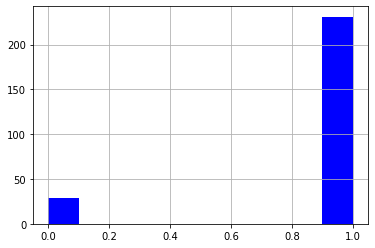

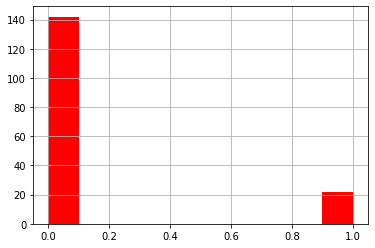

Ttest_indResult(statistic=23.21277691701378, pvalue=2.0703402795404463e-77)


In [74]:
my_ttest(dem['budget'], rep['budget'])

$H_a$ for budget bill

dems support more 0.8288973384030418 0.15286624203821655


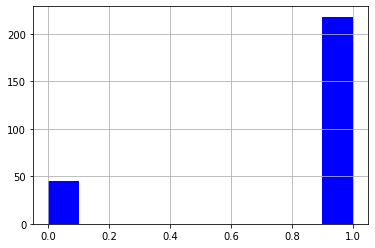

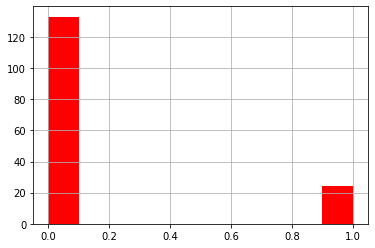

Ttest_indResult(statistic=18.052093200819733, pvalue=2.82471841372357e-54)


In [65]:
my_ttest(dem['aid-to-contras'], rep['aid-to-contras'])

$H_a$ on aid to contras

republicans support more 0.9813664596273292 0.35019455252918286


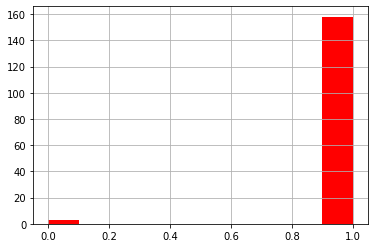

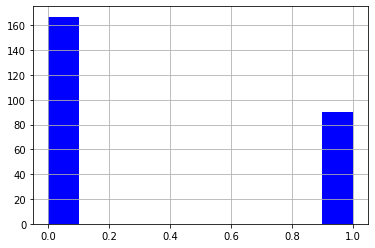

Ttest_indResult(statistic=-16.342085656197696, pvalue=9.952342705606092e-47)


In [75]:
my_ttest(dem['crime'], rep['crime'])

$H_a$ on crime bill

dems support more 0.7722007722007722 0.24074074074074073


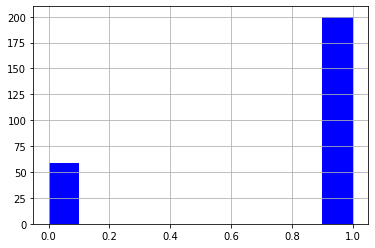

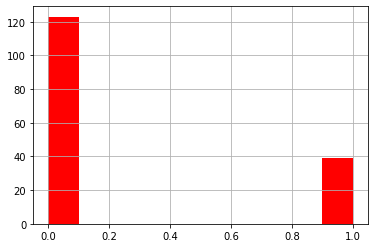

Ttest_indResult(statistic=12.526187929077842, pvalue=8.521033017443867e-31)


In [67]:
my_ttest(dem['anti-satellite-ban'], rep['anti-satellite-ban'])

$H_a$ on anti-satellite-ban

dems support more 0.6374501992031872 0.08974358974358974


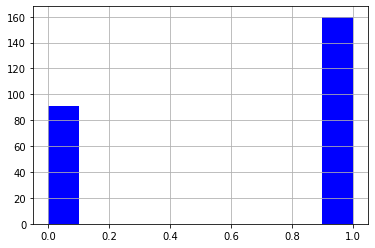

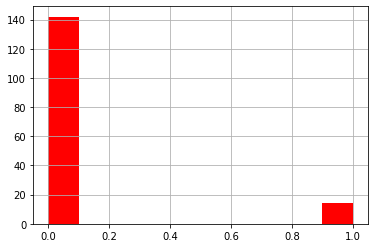

Ttest_indResult(statistic=12.853146132542978, pvalue=5.997697174347365e-32)


In [68]:
my_ttest(dem['duty-free'], rep['duty-free'])

$H_a$ on duty free bill

republicans support more 0.8709677419354839 0.14457831325301204


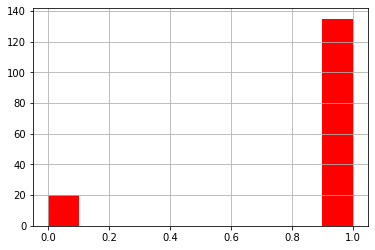

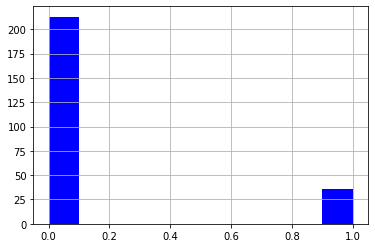

Ttest_indResult(statistic=-20.500685724563073, pvalue=1.8834203990450192e-64)


In [71]:
my_ttest(dem['education'], rep['education'])

$H_a$ on education bill


republicans support more 0.9515151515151515 0.21568627450980393


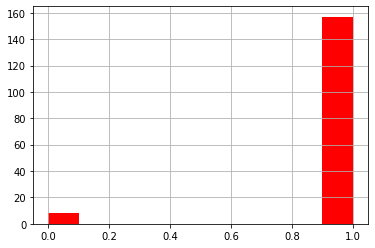

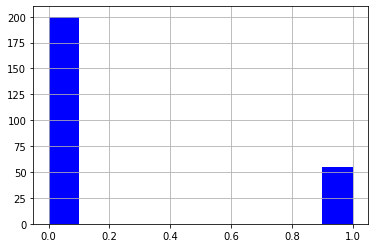

Ttest_indResult(statistic=-21.13669261173219, pvalue=5.600520111729011e-68)


In [72]:
my_ttest(dem['el-salvador-aid'], rep['el-salvador-aid'])

$H_a$ on el-salvador aid bill

dems support more 0.6046511627906976 0.18787878787878787


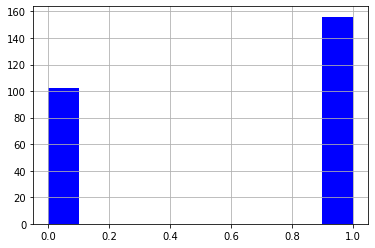

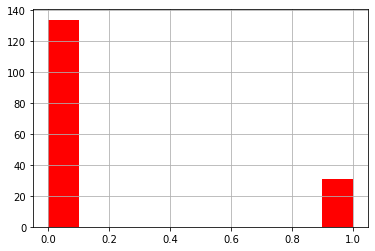

Ttest_indResult(statistic=9.205264294809222, pvalue=1.613440327937243e-18)


In [77]:
my_ttest(dem['handicapped-infants'], rep['handicapped-infants'])

$H_a$ on handicapped-infants bill

republicans support more 0.5575757575757576 0.4714828897338403


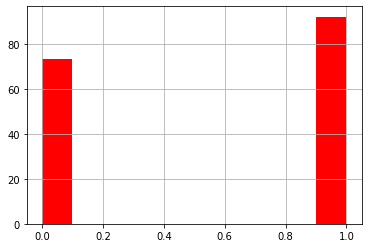

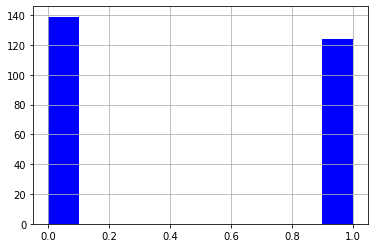

Ttest_indResult(statistic=-1.7359117329695164, pvalue=0.08330248490425066)


In [78]:
my_ttest(dem['immigration'], rep['immigration'])

$H_0$ for immigration bill

p = .083, the two parties' support for the bill is not significantly different.

dems support more 0.7580645161290323 0.11515151515151516


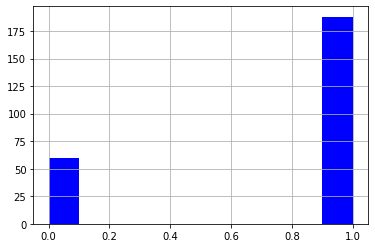

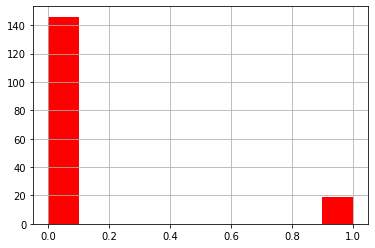

Ttest_indResult(statistic=16.437503268542994, pvalue=5.03079265310811e-47)


In [79]:
my_ttest(dem['mx-missile'], rep['mx-missile'])

$H_a$ for the mx-missle bill

republicans support more 0.9878787878787879 0.05405405405405406


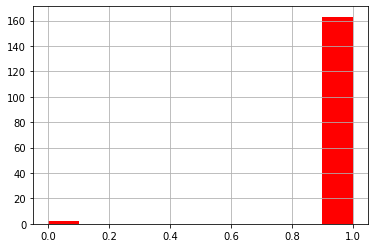

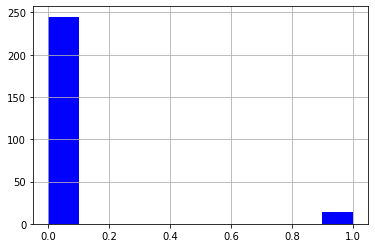

Ttest_indResult(statistic=-49.36708157301406, pvalue=1.994262314074344e-177)


In [82]:
my_ttest(dem['physician-fee-freeze'], rep['physician-fee-freeze'])

$H_a$ for physician-fee-freeze bill

republicans support more 0.8975903614457831 0.47674418604651164


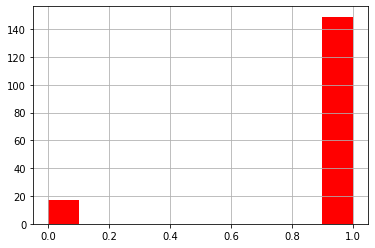

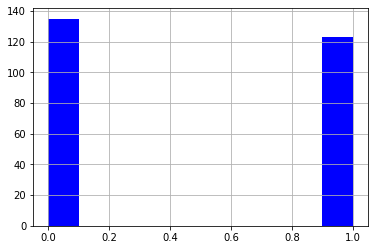

Ttest_indResult(statistic=-9.737575825219457, pvalue=2.3936722520597287e-20)


In [83]:
my_ttest(dem['religious-groups'], rep['religious-groups'])

$H_a$ for religious groups bill

republicans support more 0.8607594936708861 0.2896825396825397


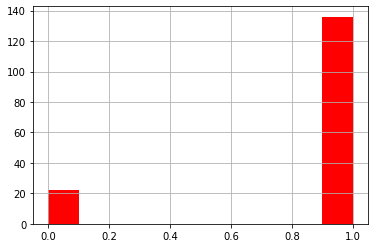

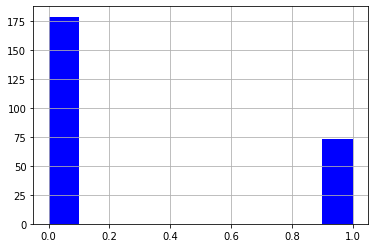

Ttest_indResult(statistic=-13.51064251060933, pvalue=1.2278581709672758e-34)


In [84]:
my_ttest(dem['right-to-sue'], rep['right-to-sue'])

$H_a$ for right to sue bill

dems support more 0.9351351351351351 0.6575342465753424


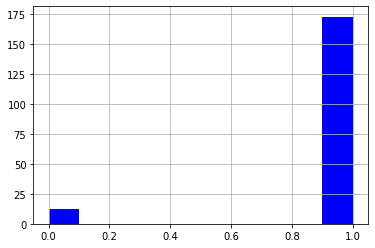

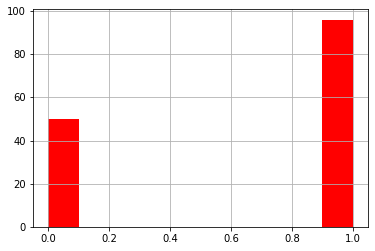

Ttest_indResult(statistic=6.849454815841208, pvalue=3.652674361672226e-11)


In [85]:
my_ttest(dem['south-africa'], rep['south-africa'])

$H_a$ for south-africa bill

even though both parties ultimately supported it the republicans had enough disenters to be statistically significant in their difference of support from dems.

dems support more 0.5058823529411764 0.1320754716981132


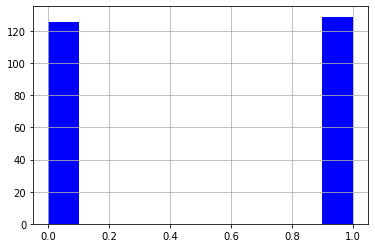

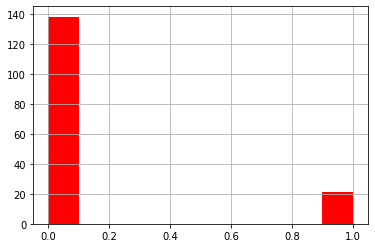

Ttest_indResult(statistic=8.293603989407588, pvalue=1.5759322301054064e-15)


In [86]:
my_ttest(dem['synfuels'], rep['synfuels'])

$H_a$ for synfuels bill

republicans support more 0.5067567567567568 0.502092050209205


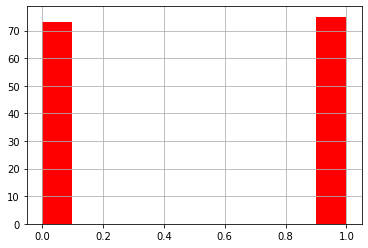

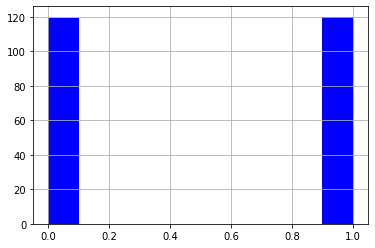

Ttest_indResult(statistic=-0.08896538137868286, pvalue=0.9291556823993485)


In [87]:
my_ttest(dem['water-project'], rep['water-project'])

$H_0$ for water project bill

the two parties are equally divided on support for the bill so that they have no statistical difference between each other in overall support.